# **Project Name**    - Stock Market Price Prediction

**Author Name:** Kushagra Mishra

In [ ]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    accuracy_score,
    precision_score,
    confusion_matrix,
    recall_score,
    f1_score
)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
# Load data
df = pd.read_csv("SBIN.csv")

## Data Analysis and Visualization

In [ ]:
# Display the first 5 rows of the dataframe
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-01-1996  18.691147  18.978922  18.540184  18.823240  12.409931   
1  02-01-1996  18.894005  18.964767  17.738192  18.224106  12.014931   
2  03-01-1996  18.327892  18.568489  17.643839  17.738192  11.694577   
3  04-01-1996  17.502312  17.832542  17.223972  17.676863  11.654142   
4  05-01-1996  17.738192  17.785366  17.459852  17.577793  11.588827   

        Volume  
0  43733533.00  
1  56167280.00  
2  68296318.00  
3  71786708.75  
4  71786708.75

In [ ]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7074 non-null   object 
 1   Open       7065 non-null   float64
 2   High       7065 non-null   float64
 3   Low        7065 non-null   float64
 4   Close      7065 non-null   float64
 5   Adj Close  7065 non-null   float64
 6   Volume     7065 non-null   float64
dtypes: float64(6), object(1)
memory usage: 387.0+ KB


In [ ]:
# Display summary statistics of the dataframe
df.describe()

Open         High          Low        Close    Adj Close  \
count  7065.000000  7065.000000  7065.000000  7065.000000  7065.000000   
mean    180.682841   183.085167   177.998209   180.448294   166.021712   
std     154.773229   156.345078   152.980516   154.630549   152.903249   
min      13.478195    13.935802    13.214009    13.346102     9.531410   
25%      28.423565    28.824560    28.022570    28.456589    19.854374   
50%     173.100006   176.500000   170.250000   172.925003   152.411270   
75%     265.500000   268.899994   261.299988   265.174988   245.764954   
max     703.650024   728.349976   694.200012   725.250000   725.250000   

             Volume  
count  7.065000e+03  
mean   3.130217e+07  
std    3.462744e+07  
min    0.000000e+00  
25%    1.299123e+07  
50%    2.064292e+07  
75%    3.651478e+07  
max    4.469483e+08

In [ ]:
# Display the number of missing values in each column
df.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

### Documentation: Handling Missing Data in Stock Price DataFrame

In this section, we handle missing values (NaN) in the stock price DataFrame by using forward fill (`ffill`). This method ensures that missing values are filled by propagating the previous non-null value.

#### Code Explanation:

1. **Filling NaN using `ffill()`**:
   - We use the `ffill()` method, which fills missing values by propagating the last valid observation forward.
   - This is particularly useful in time-series data like stock prices.

2. **Checking for Remaining NaN Values**:
   - After handling the missing values, we use `isnull().sum()` to verify that there are no remaining NaN values in the DataFrame.


In [ ]:
# Using forward fill for time-series continuity
df['Open'] = df['Open'].ffill()
df['High'] = df['High'].ffill()
df['Low'] = df['Low'].ffill()
df['Close'] = df['Close'].ffill()
df['Adj Close'] = df['Adj Close'].ffill()
df['Volume'] = df['Volume'].ffill()

# Checking for remaining NaN values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Documentation: Handling Outliers in Stock Price Data

In this section, we handle outliers in the stock price data using the Interquartile Range (IQR) method. Outliers are defined as values that fall outside 1.5 times the IQR below Q1 or above Q3.

#### Code Explanation:

1. **Detecting Outliers**:
   - We first calculate the IQR for each column (`Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`) to identify potential outliers.
   
2. **Handling Outliers**:
   - We replace values identified as outliers by capping them at the 1st percentile (lower bound) or the 99th percentile (upper bound) to reduce the impact of extreme values.

#### Python Code Implementation:


In [ ]:
# Detecting and handling outliers using the Interquartile Range (IQR) method

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers at the lower and upper bounds
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

# Applying the function to the relevant columns
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in columns_to_check:
    handle_outliers(df, col)

# Checking for remaining outliers by printing descriptive statistics
df.describe()

Open         High          Low        Close    Adj Close  \
count  7074.000000  7074.000000  7074.000000  7074.000000  7074.000000   
mean    180.566028   182.967081   177.861698   180.320342   165.509789   
std     154.378208   155.940446   152.529681   154.199712   151.382248   
min      13.478195    13.935802    13.214009    13.346102     9.531410   
25%      28.494329    28.871737    28.054413    28.489611    19.865707   
50%     173.100006   176.500000   170.290001   172.937500   152.463203   
75%     265.245011   268.892494   261.237503   265.082496   245.745831   
max     620.371033   628.923630   611.012137   619.971824   584.566015   

             Volume  
count  7.074000e+03  
mean   2.709130e+07  
std    1.988562e+07  
min    0.000000e+00  
25%    1.299895e+07  
50%    2.064730e+07  
75%    3.651406e+07  
max    7.178671e+07

### Detailed

In [ ]:
# Function to create scatter plots
def create_scatter_plot(x_data, y_data, size_data=None, title=None, x_label=None, y_label=None, figsize=(15,7)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x_data, y=y_data, size=size_data)
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.show()

In [ ]:
# Function to create line plots
def create_line_plot(x_data, y_data, title=None, x_label=None, y_label=None, figsize=(15,7)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=x_data, y=y_data)
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.show()

Plot the relationship between 'Date' and 'Volume'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded=le.fit_transform(df['Date'])
print(encoded)

[   0  222  442 ... 1422 1657 1894]


In [ ]:
df.drop("Date",axis=1,inplace=True)
df["Date"]=encoded
df.head()

Open       High        Low      Close  Adj Close       Volume  Date
0  18.691147  18.978922  18.540184  18.823240  12.409931  43733533.00     0
1  18.894005  18.964767  17.738192  18.224106  12.014931  56167280.00   222
2  18.327892  18.568489  17.643839  17.738192  11.694577  68296318.00   442
3  17.502312  17.832542  17.223972  17.676863  11.654142  71786708.75   678
4  17.738192  17.785366  17.459852  17.577793  11.588827  71786708.75   914

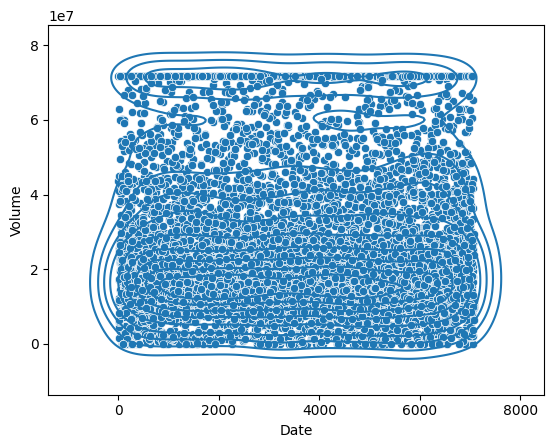

In [ ]:
# Plot the relationship between 'Date' and 'Volume'
sns.scatterplot(x = df['Date'], y = df['Volume'])
sns.kdeplot(x = df['Date'], y = df['Volume'])
plt.show()

Early 1990s spike: There is a high trading volume around the mid-1990s, peaking at over 4 × 10^8 (400 million trades).
Post-1996 to 2020: The volume significantly decreases, showing lower levels of activity with some fluctuations and minor peaks, particularly after 2016.


Plot the price variation over time

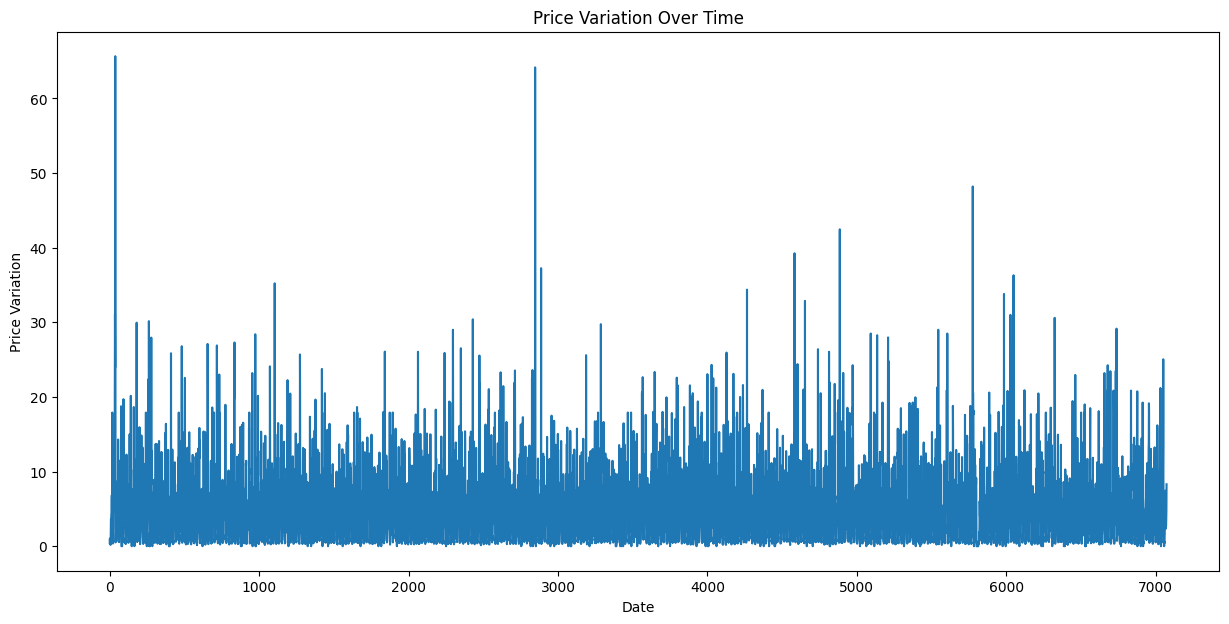

In [ ]:
# Plot the price variation over time
create_line_plot(df['Date'], df['High'] - df['Low'],
                 title='Price Variation Over Time', x_label='Date', y_label='Price Variation')

#### Stable period until 2004:
The price variation was relatively low and stable until around 2003-2004, generally staying under 10 units.
#### 2004-2008 increase:
Starting from 2004, price variations gradually began to increase, peaking sharply just before the 2008 financial crisis. Some spikes went beyond 40 units.
#### 2008-2020 fluctuations:
After the 2008 peak, price variation showed continuous fluctuations with noticeable peaks, though they were more frequent post-2016.
#### 2020 onward:
The recent period (2020-2024) shows significant and frequent fluctuations, with peaks reaching 60+ units, possibly influenced by events like the COVID-19 pandemic and other global factors.

Plot the relationship between 'Adj Close' and 'Volume'

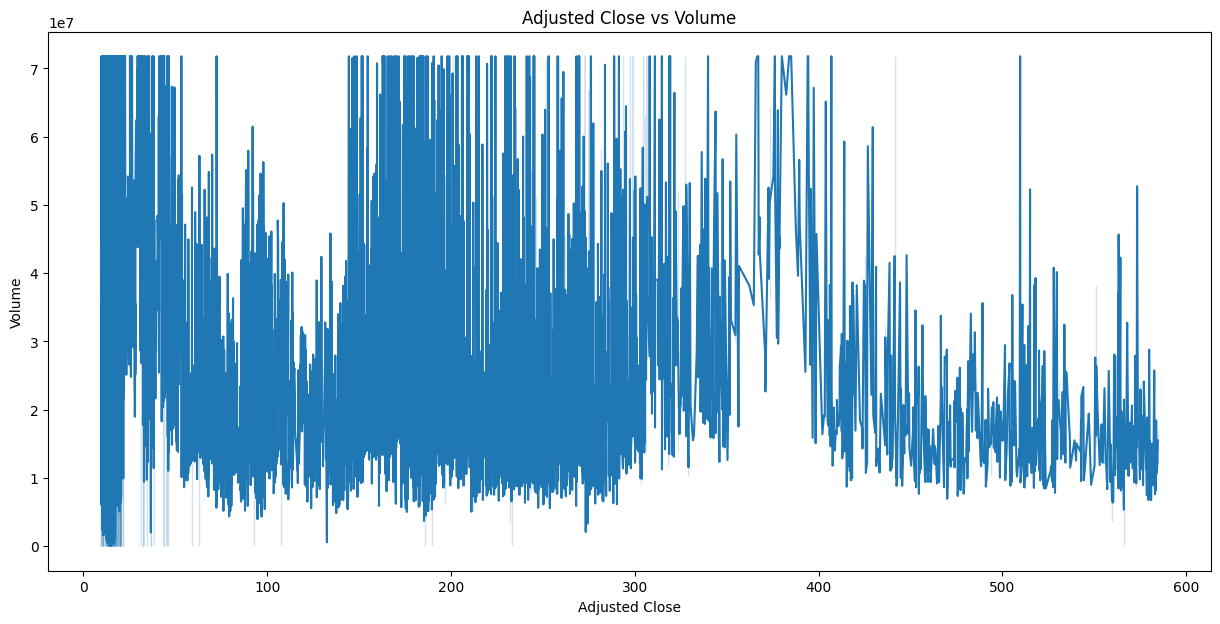

In [ ]:
# Plot the relationship between 'Adj Close' and 'Volume'
create_line_plot(df['Adj Close'], df['Volume'],
                 title='Adjusted Close vs Volume',
                 x_label='Adjusted Close',
                 y_label='Volume')

The overall trend seems to be somewhat volatile, with periods of upward and downward movement.

Plot the relationship between 'Open' and 'Adj Close'

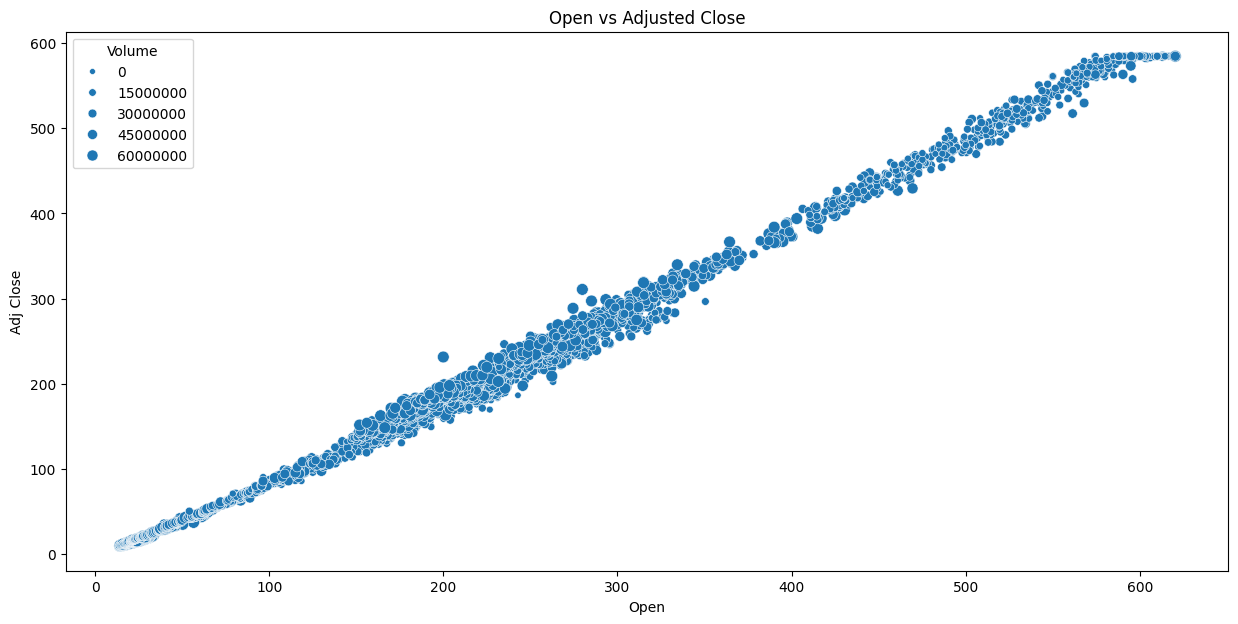

In [ ]:
# Plot the relationship between 'Open' and 'Adj Close'
create_scatter_plot(df['Open'], df['Adj Close'], size_data=df['Volume'],
                    title='Open vs Adjusted Close', x_label='Open', y_label='Adj Close')

The scatter points generally show an upward trend, indicating a positive correlation between the opening and closing prices. This means that, in general, when the stock opens higher, it tends to close higher as well.

Plot the relationship between 'Close' and 'Adj Close'

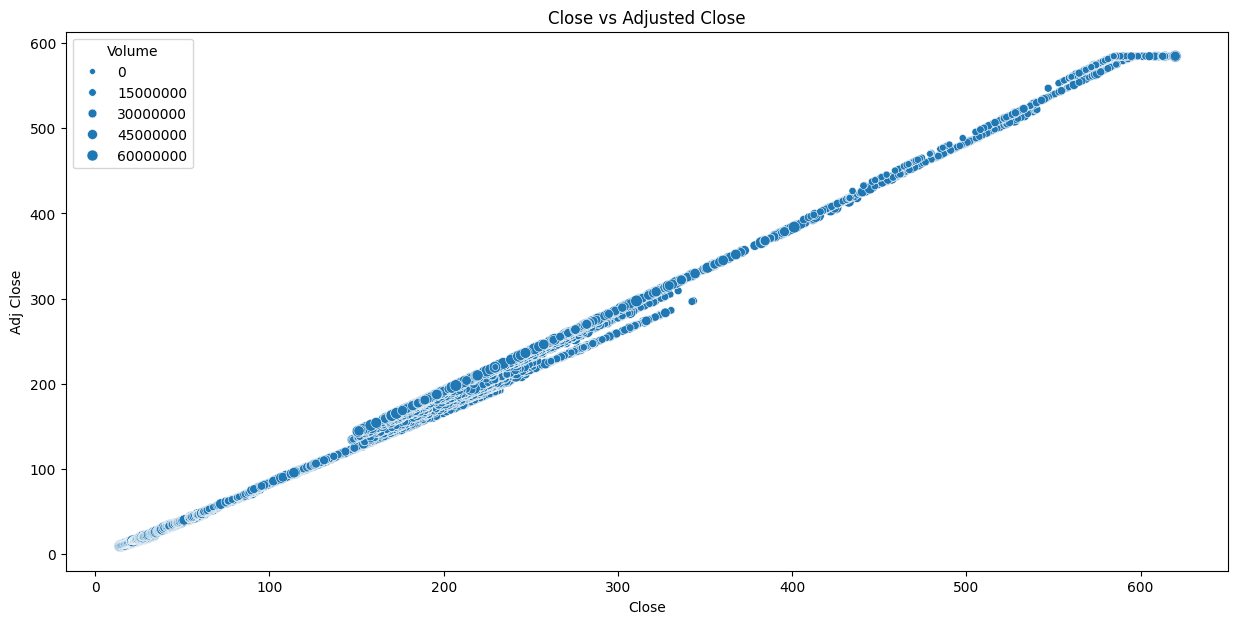

In [ ]:
# Plot the relationship between 'Close' and 'Adj Close'
create_scatter_plot(df['Close'], df['Adj Close'], size_data=df['Volume'],
                    title='Close vs Adjusted Close', x_label='Close', y_label='Adj Close')

The scatter points show a very strong upward trend, indicating a strong positive correlation between the closing price and the adjusted closing price. This means that, in general, when the stock closes higher, the adjusted closing price is also higher.

Plot the relationship between 'Open' and 'Close'

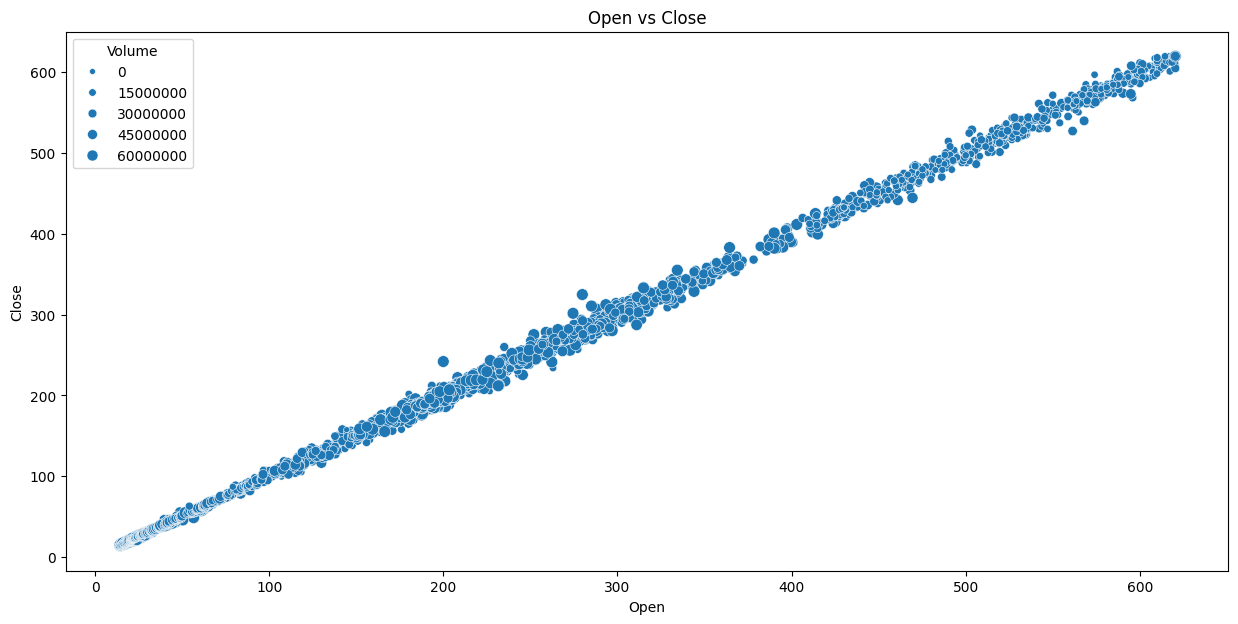

In [ ]:
# Plot the relationship between 'Open' and 'Close'
create_scatter_plot(df['Open'], df['Close'], size_data=df['Volume'],
                    title='Open vs Close', x_label='Open', y_label='Close')

Plot the relationship between 'Open - Close' and 'High - Low'

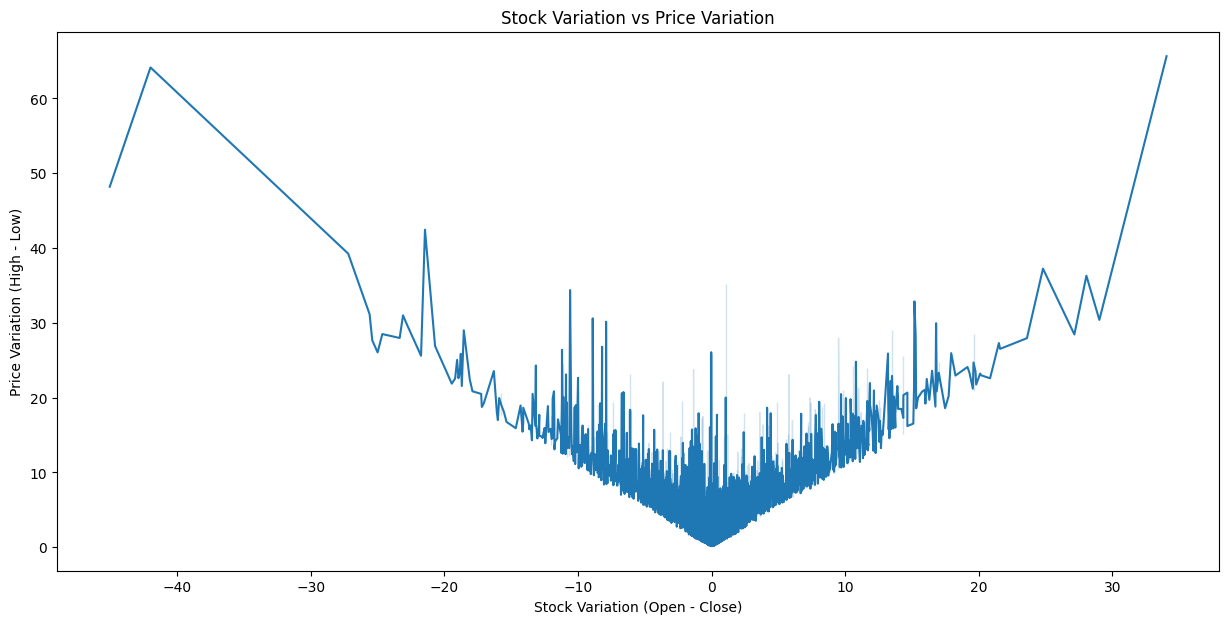

In [ ]:
# Plot the relationship between 'Open - Close' and 'High - Low'
create_line_plot(df['Open'] - df['Close'], df['High'] - df['Low'],
                 title='Stock Variation vs Price Variation',
                 x_label='Stock Variation (Open - Close)',
                 y_label='Price Variation (High - Low)')

This figure indicates greater price variation at the extremes of stock movement.

Plot the effect of price differences on volume

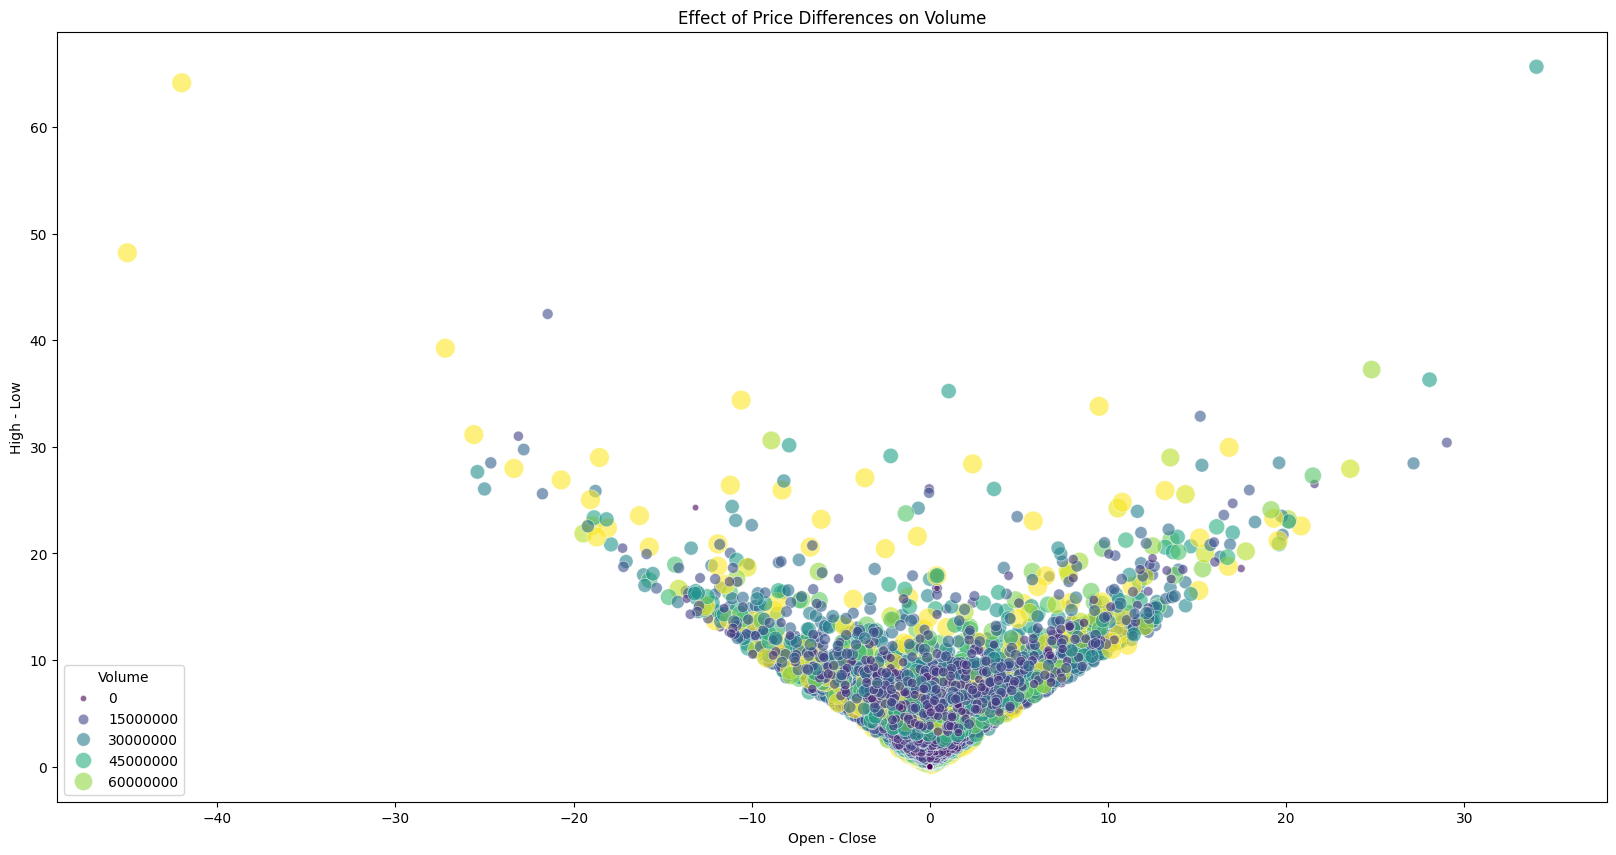

In [ ]:
# Plot the effect of price differences on volume
plt.figure(figsize = (20,10))
sns.scatterplot(x=df['Open'] - df['Close'], y=df['High'] - df['Low'], hue=df['Volume'], palette='viridis', size=df['Volume'], sizes=(20, 200), alpha=0.6)
plt.title('Effect of Price Differences on Volume')
plt.xlabel('Open - Close')
plt.ylabel('High - Low')
plt.show()

Plot the effect of price differences on adjusted close

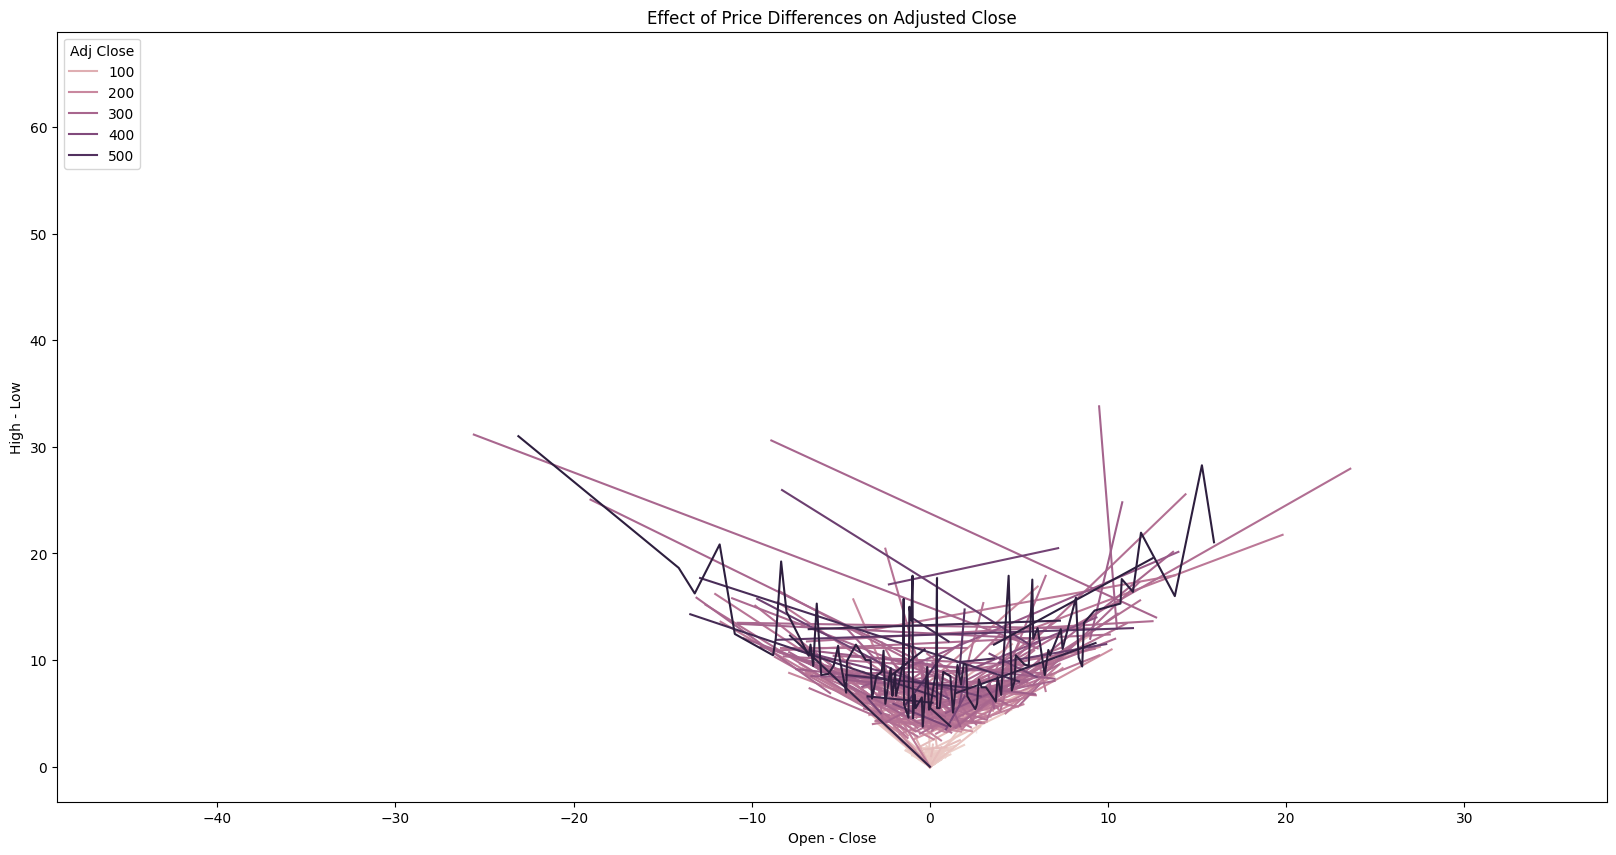

In [ ]:
# Plot the effect of price differences on adjusted close
plt.figure(figsize = (20,10))
sns.lineplot(x = df['Open']-df['Close'], y = df['High'] - df['Low'], hue = df['Adj Close'])
plt.title('Effect of Price Differences on Adjusted Close')
plt.xlabel('Open - Close')
plt.ylabel('High - Low')
plt.show()

Plot the relationship between 'Open - Close' and 'Adj Close'

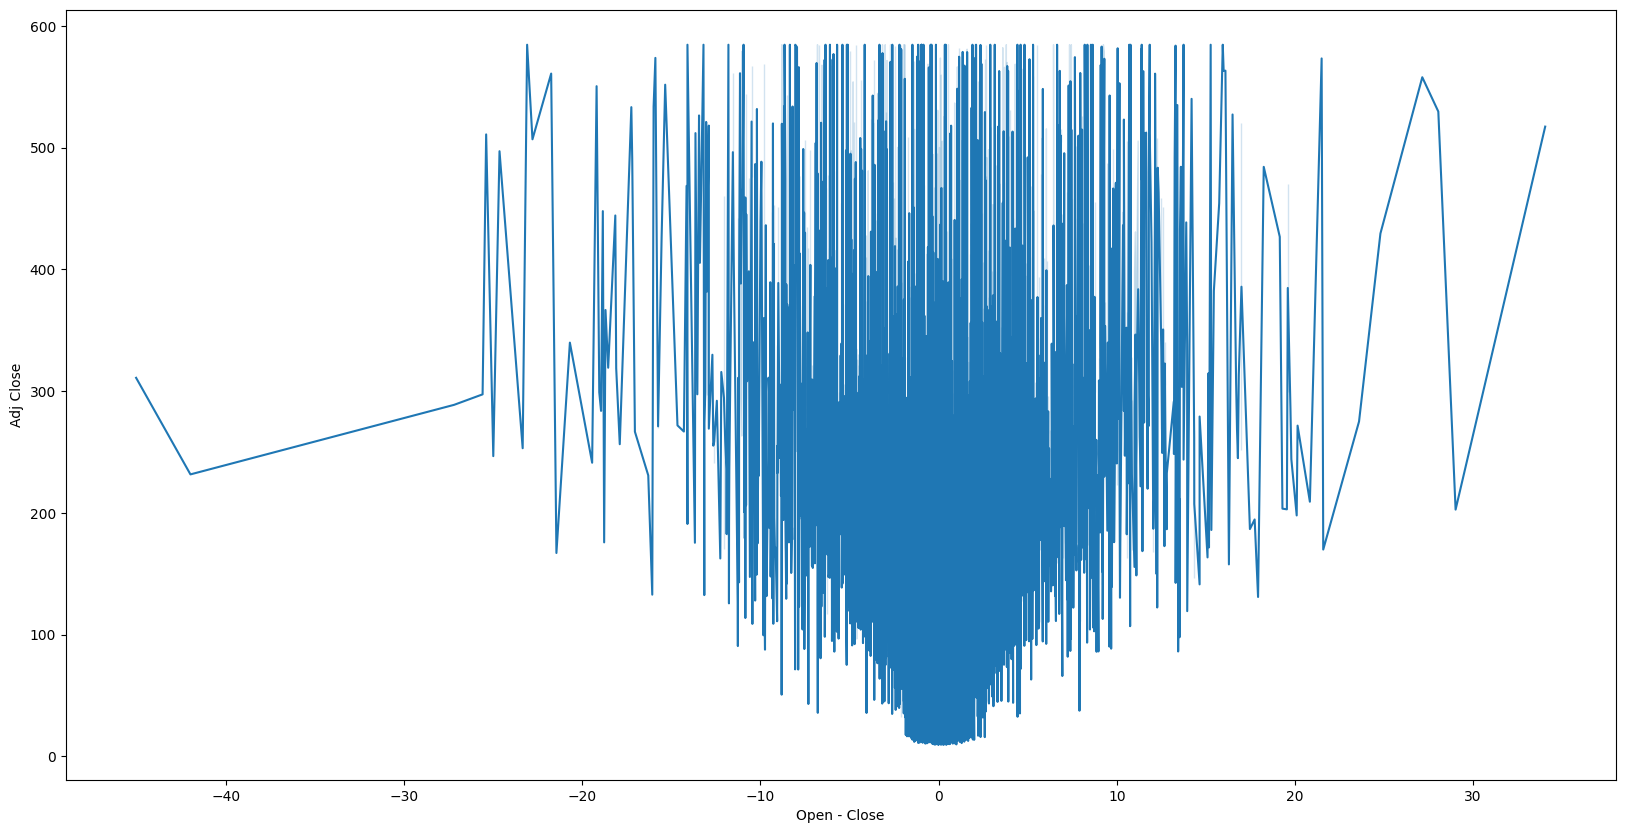

In [ ]:
# Plot the relationship between 'Open - Close' and 'Adj Close'
plt.figure(figsize = (20,10))
sns.lineplot(x = df['Open']-df['Close'], y = df['Adj Close'])
plt.xlabel('Open - Close')
plt.show()

Create a pair plot of stock features

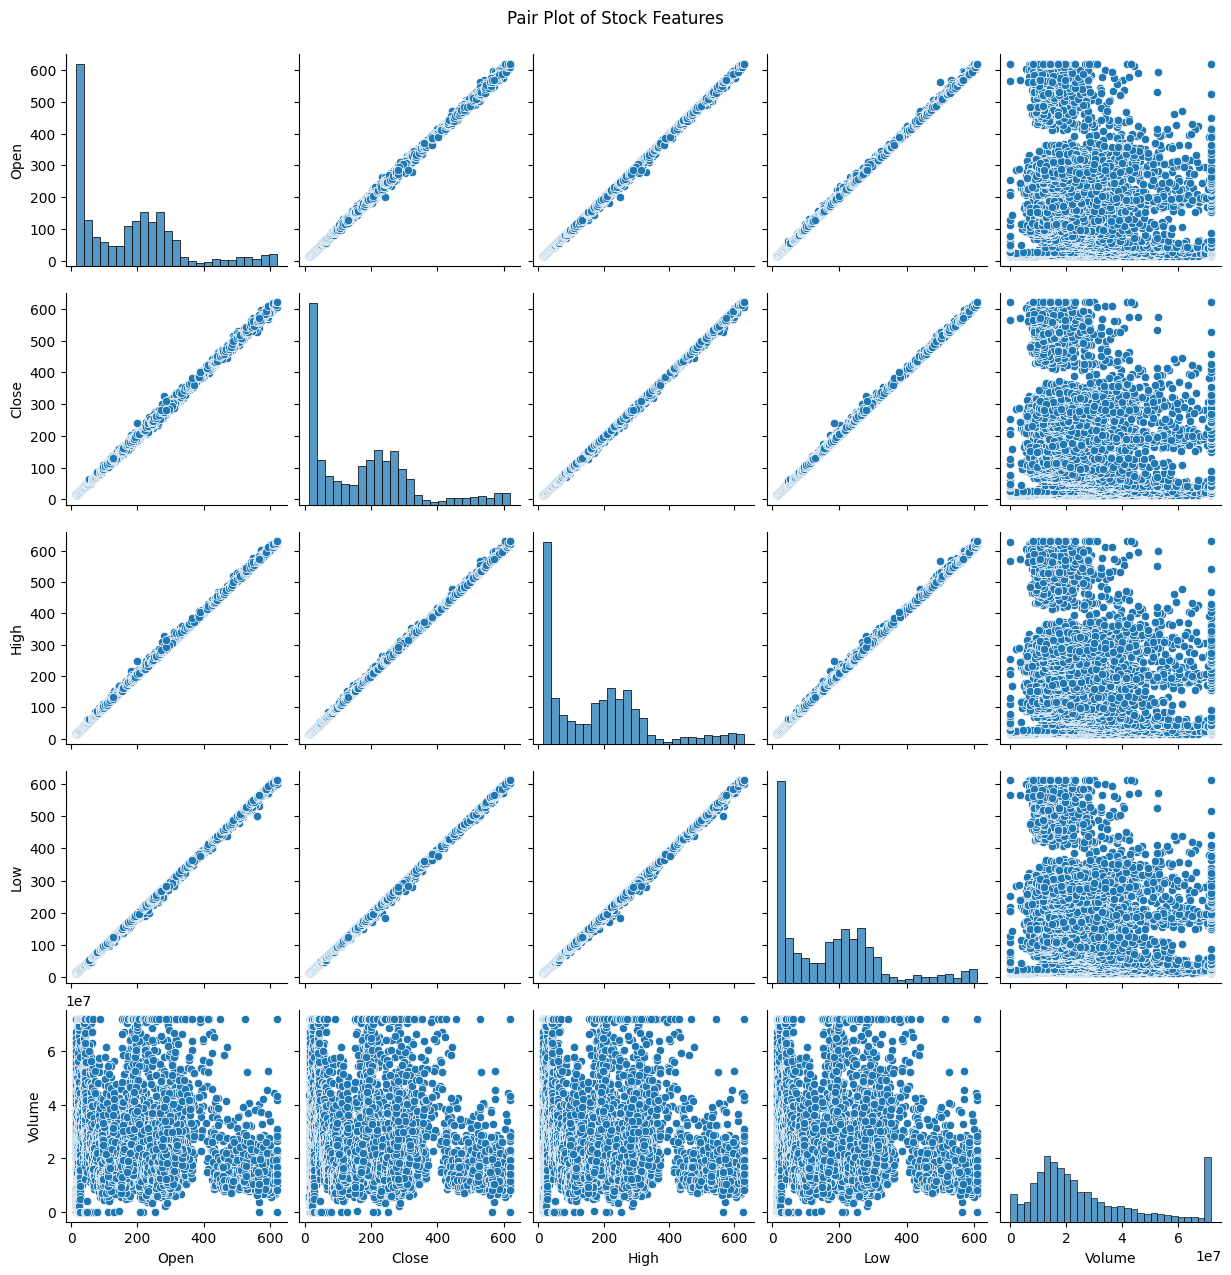

In [ ]:
# Create a pair plot of stock features
subset = df[['Open', 'Close', 'High', 'Low', 'Volume']]
sns.pairplot(subset)
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()

Create a 3D scatter plot of 'Open', 'Close', and 'Volume'

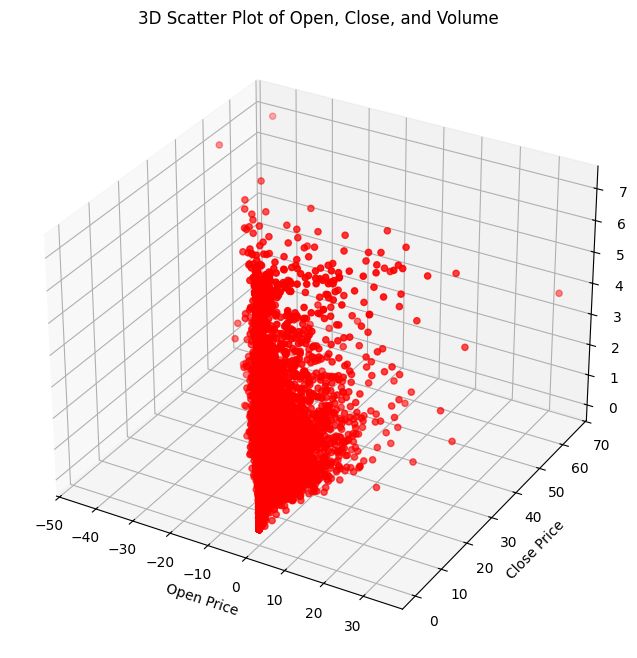

In [ ]:
# Create a 3D scatter plot of 'Open', 'Close', and 'Volume'
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open']- df['Close'], df['High'] - df['Low'],df['Volume'], c='r', marker='o')
ax.set_xlabel('Open Price')
ax.set_ylabel('Close Price')
ax.set_zlabel('Volume')
plt.title('3D Scatter Plot of Open, Close, and Volume')
plt.show()


Calculate the correlation matrix

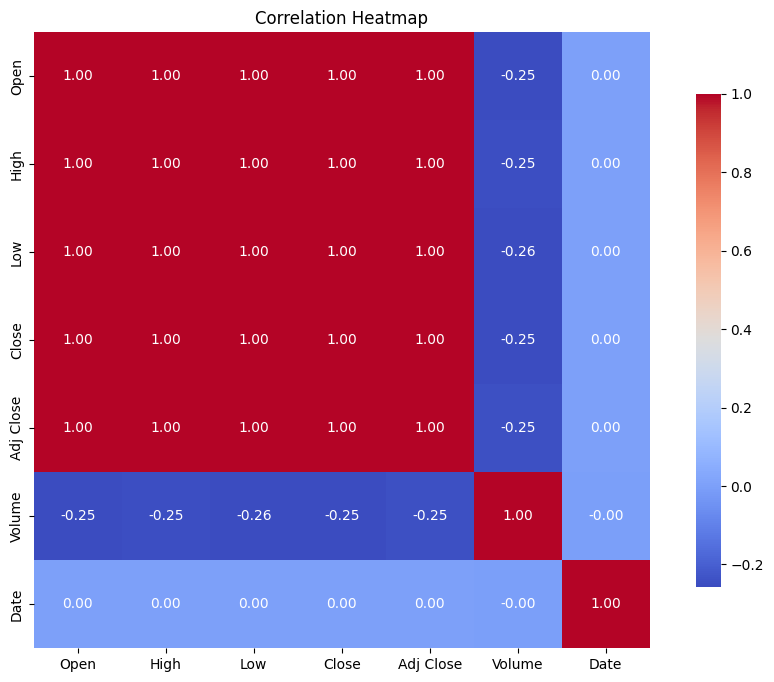

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()
plt.show()

The high correlation between 'Open,' 'High,' 'Low,' 'Close,' and 'Adj Close' shows these features are highly interdependent and tend to move together in the same direction.
The negative correlation of 'Volume' with price-related features suggests that increased trading volume does not necessarily coincide with an increase in stock prices.

#### More Charts

In [ ]:
from plotly.offline import plot
import plotly.graph_objs as go

A line chart is a simple and effective way to visualize the closing price of the stock over time

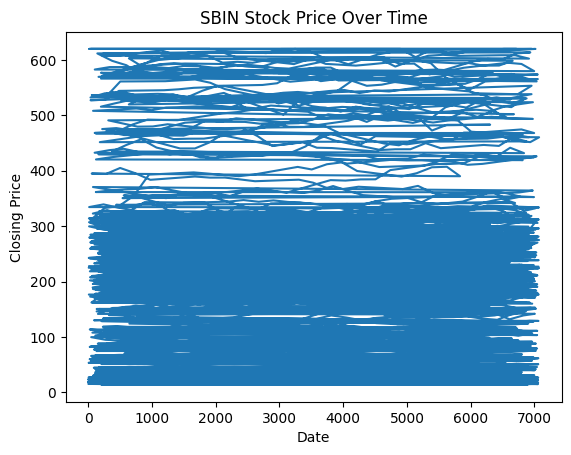

In [ ]:
# Plot the closing price over time
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('SBIN Stock Price Over Time')
plt.show()

A candlestick chart is a more detailed way to visualize the stock price, showing the high, low, open, and close prices for each day

In [ ]:
# Plot the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
plot(fig, filename='candlestick_chart.html')

'candlestick_chart.html'

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\plotly\offline\offline.py:557: UserWarning:

Your filename `candlestick_chart` didn't end with .html. Adding .html to the end of your file.


'candlestick_chart.html'

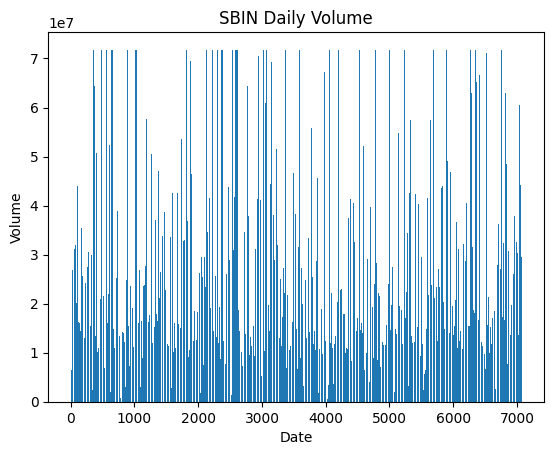

In [ ]:
# Plot the daily volume
plt.bar(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('SBIN Daily Volume')
plt.show()

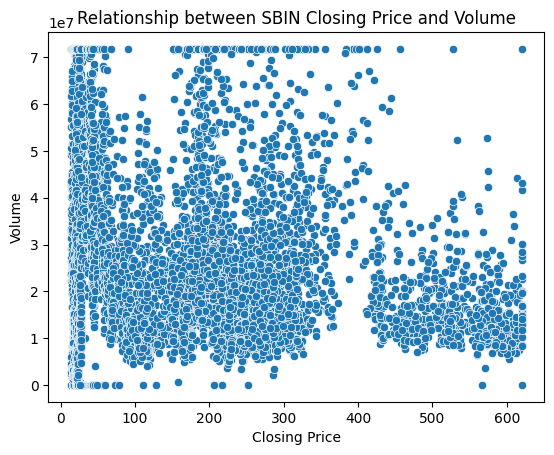

In [ ]:
# Plot the scatter plot of closing price vs volume
sns.scatterplot(x=df['Close'], y=df['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Relationship between SBIN Closing Price and Volume')
plt.show()

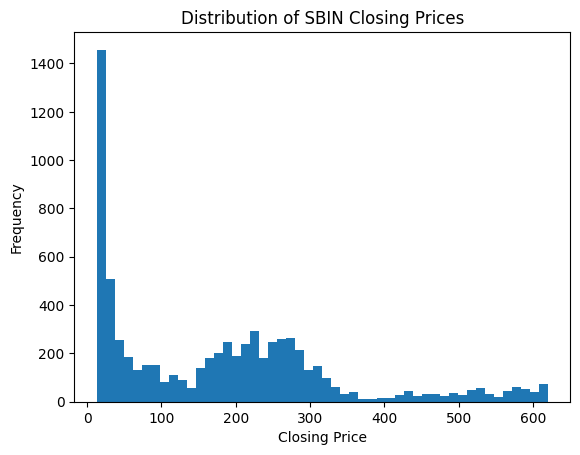

In [ ]:
# Plot the histogram of closing prices
plt.hist(df['Close'], bins=50)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of SBIN Closing Prices')
plt.show()

A moving average chart is a type of chart that shows the average value of a stock's price over a certain period of time. It is used to smooth out the fluctuations in the price and to identify trends.

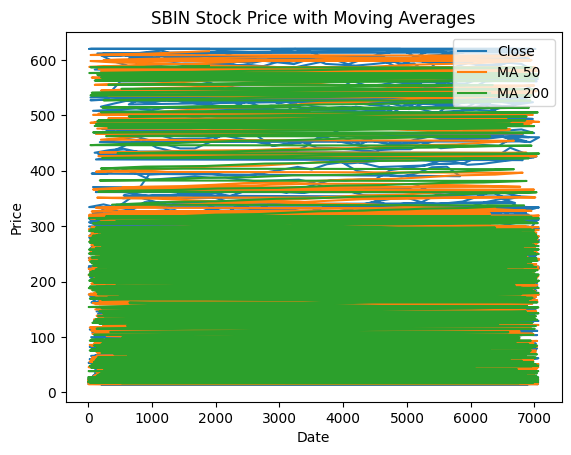

In [ ]:
# Plot the moving average chart
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_50'], label='MA 50')
plt.plot(df['Date'], df['MA_200'], label='MA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBIN Stock Price with Moving Averages')
plt.legend()
plt.show()

This chart shows the closing price of the stock (blue line) along with its 20-day moving average (red line) and two standard deviations plotted above (green line) and below (orange line) it. The Bollinger Bands are used to identify volatility in the stock price

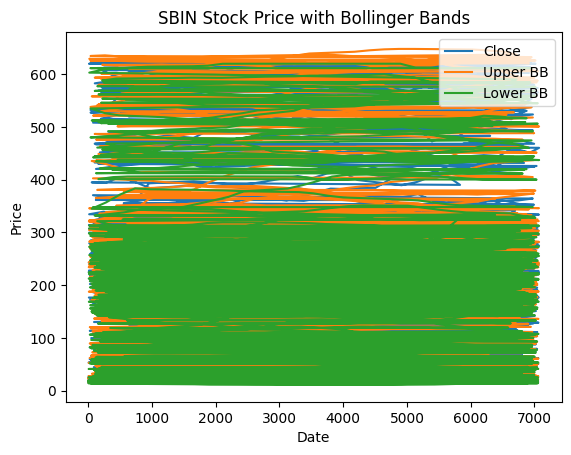

In [ ]:
# Plot the Bollinger Bands chart
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_BB'] = df['MA_20'] + 2*df['Close'].rolling(window=20).std()
df['Lower_BB'] = df['MA_20'] - 2*df['Close'].rolling(window=20).std()

plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Upper_BB'], label='Upper BB')
plt.plot(df['Date'], df['Lower_BB'], label='Lower BB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBIN Stock Price with Bollinger Bands')
plt.legend()
plt.show()

 This chart shows the RSI of the stock (blue line) along with two horizontal lines at 30 (red line) and 70 (green line). The RSI is used to identify overbought (above 70) and oversold (below 30) conditions.


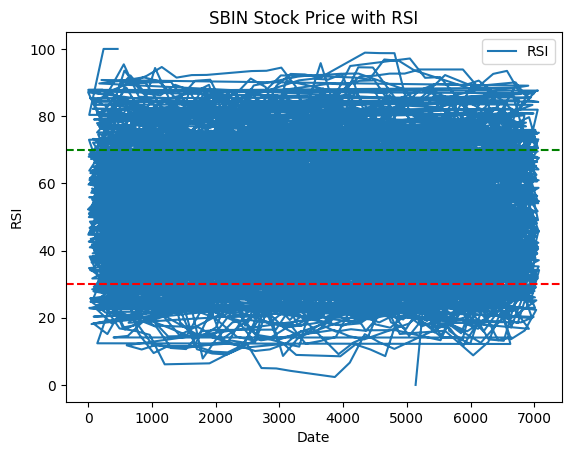

In [ ]:
# Plot the RSI chart
delta = df['Close'].diff(1)
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.rolling(window=14).mean()
roll_down = down.rolling(window=14).mean().abs()
RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))

plt.plot(df['Date'], RSI, label='RSI')
plt.axhline(y=30, color='red', linestyle='--')
plt.axhline(y=70, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('SBIN Stock Price with RSI')
plt.legend()
plt.show()

This chart shows the correlation between the open, high, low, close, and volume of the stock. The correlation is measured on a scale of -1 to 1, where 1 means perfect positive correlation and -1 means perfect negative correlation.

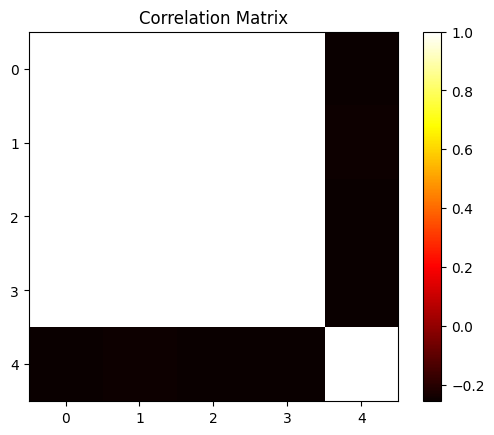

In [ ]:
# Plot the heatmap
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

## Feature Engineering

### Handle missing values

In [ ]:
# Drop unnecessary columns('Date' and 'Adj Close')
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [ ]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### Adding Indicators

#### SMA

Its the avg of stock price over a specific time period

SMA = (sum of closing price os past n days) / n

It helps identify trends by filtering out shortterm fluctuations

Price above SMA indicates Uptrend and price below SMA indicates lowertrend

In [ ]:
# Calculate the Simple Moving Average (SMA)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

In [ ]:
# Drop rows with missing values
df.dropna(subset=['SMA_10', 'SMA_50'], inplace=True)

##### SMA Graph

of how many past days you want to see graph: 365


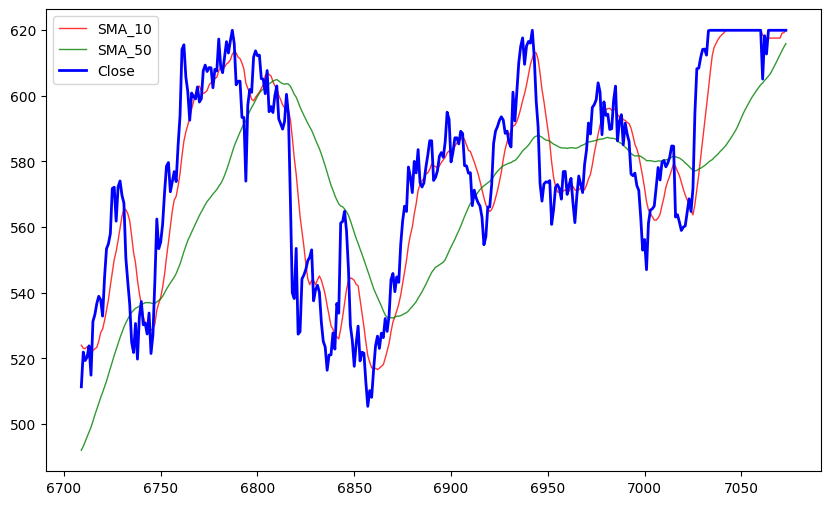

In [ ]:
# Plot the SMA graph
fig, ax1 = plt.subplots(figsize=(10, 6))
days = int(input("of how many past days you want to see graph: "))
ax1.plot(df["SMA_10"][-days:], label = "SMA_10", color='Red', linewidth=1, alpha=0.8)
ax1.plot(df["SMA_50"][-days:], label = "SMA_50", color='Green', linewidth=1, alpha=0.8)
ax1.plot(df["Close"][-days:], label = "Close", color='Blue', linewidth=2)

plt.legend()
plt.show()

#### RSI

It is a momentum indicator used to measure the speed and change of price movements. It ranges from 0 to 100 and helps identify whether a stock is overbought or oversold.  

RSI > 70: Overbought  
RSI < 30: Oversold

In [ ]:
# Calculate the Relative Strength Index (RSI)
delta = df['Close'].diff(1)

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss  # Relative Strength
df['RSI'] = 100 - (100 / (1 + rs))



In [ ]:
# Drop rows with missing values
df.dropna(subset=['RSI'], inplace=True)

##### RSI Graph

of how many past days you want to see graph: 365


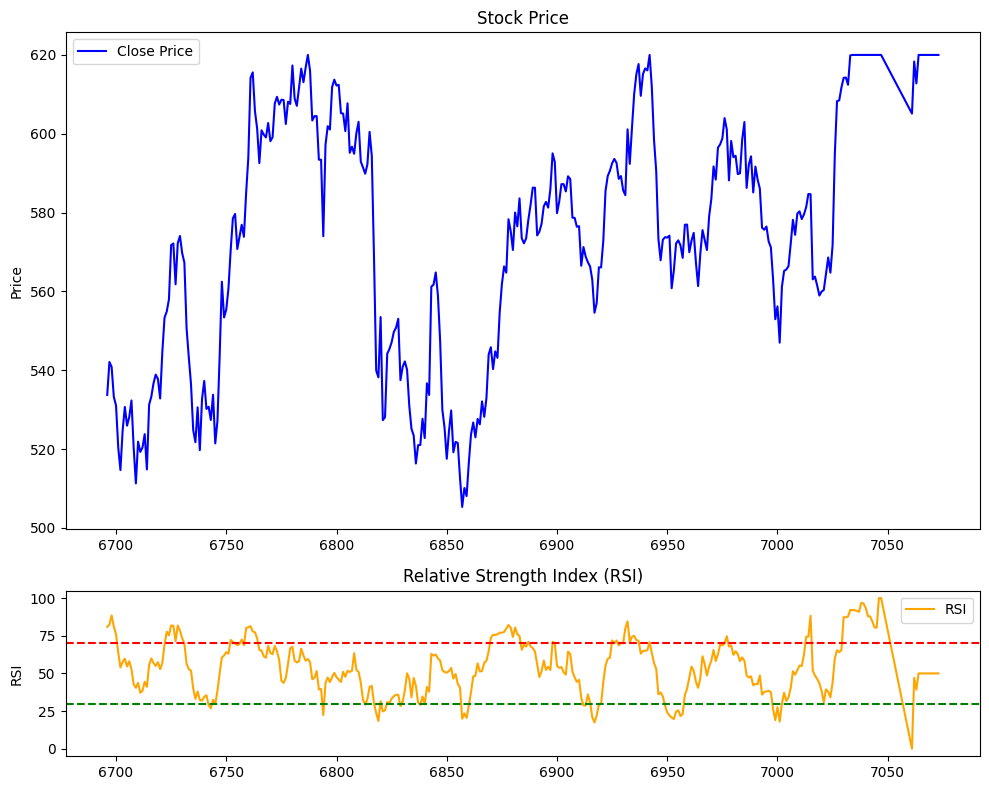

In [ ]:
# Plot the RSI graph

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

days = int(input("of how many past days you want to see graph: "))
# price graph
ax1.plot(df['Close'][-days:], label='Close Price', color='blue')
ax1.set_title('Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# rsi graph
ax2.plot(df['RSI'][-days:], label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--')  # Overbought line
ax2.axhline(30, color='green', linestyle='--')  # Oversold line
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()
plt.show()


#### MACD

In [ ]:
# Calculate the Moving Average Convergence Divergence (MACD)
# Calculate the short-term and long-term EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD and Signal line
df['MACD'] = df['EMA_12'] - df['EMA_26']  # MACD line
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()  # Signal line

##### MACD Graph

of how many past days you want to see graph: 365


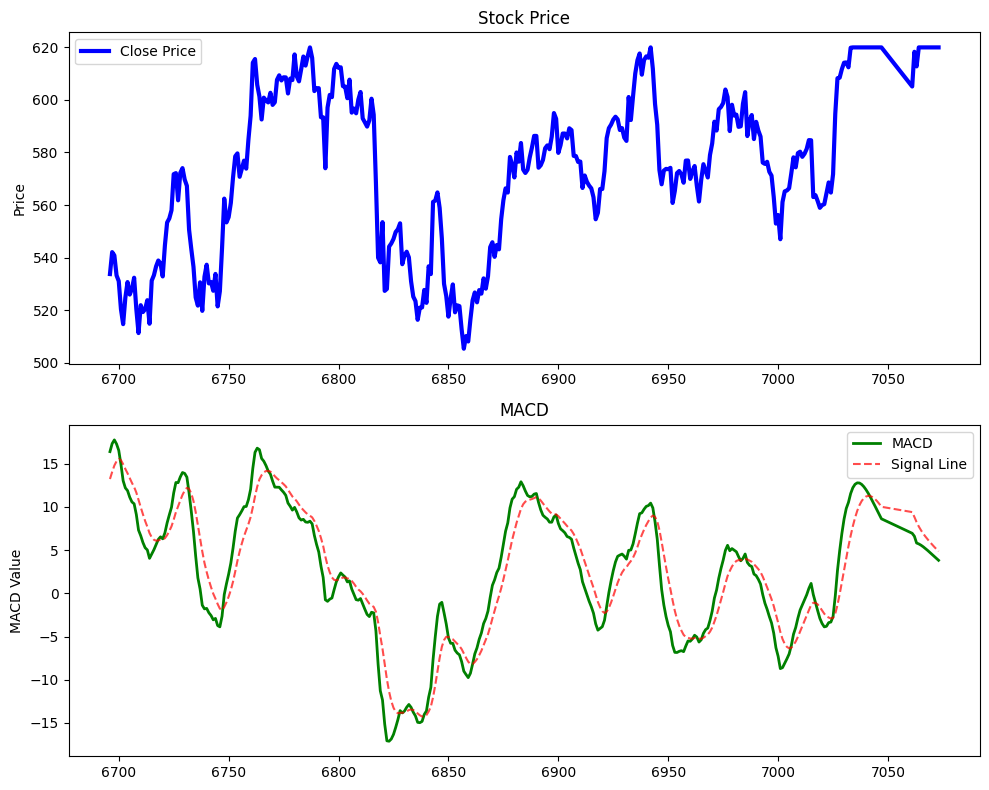

In [ ]:
# Plot the MACD
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


days = int(input("of how many past days you want to see graph: "))
# Plot stock price on first subplot (bold)
ax[0].plot( df['Close'][-days:], label='Close Price', color='blue', linewidth=3)
ax[0].set_title('Stock Price')
ax[0].set_ylabel('Price')

# Plot MACD and Signal line on second subplot
ax[1].plot( df['MACD'][-days:], label='MACD', color='green', linewidth=2)
ax[1].plot( df['Signal_Line'][-days:], label='Signal Line', color='red', linestyle='--', alpha=0.7)
ax[1].set_title('MACD')
ax[1].set_ylabel('MACD Value')

# Show legends
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()


#### Corrrelations

In [ ]:
corr = df.corr()
corr

Open      High       Low     Close    Volume     MA_50  \
Open         1.000000  0.999815  0.999793  0.999617 -0.246546  0.992571   
High         0.999815  1.000000  0.999718  0.999829 -0.243002  0.992487   
Low          0.999793  0.999718  1.000000  0.999822 -0.249420  0.992252   
Close        0.999617  0.999829  0.999822  1.000000 -0.245814  0.992269   
Volume      -0.246546 -0.243002 -0.249420 -0.245814  1.000000 -0.246938   
MA_50        0.992571  0.992487  0.992252  0.992269 -0.246938  1.000000   
MA_200       0.962518  0.962488  0.962356  0.962335 -0.193587  0.974213   
MA_20        0.997322  0.997215  0.997049  0.997022 -0.248930  0.997064   
Upper_BB     0.996222  0.996336  0.995721  0.995923 -0.239543  0.995784   
Lower_BB     0.994995  0.994642  0.994977  0.994695 -0.258516  0.994939   
SMA_10       0.998927  0.998830  0.998702  0.998664 -0.247945  0.994827   
SMA_50       0.992571  0.992487  0.992252  0.992269 -0.246938  1.000000   
RSI          0.064933  0.067409  0.068320  0.070092  0.066675 -0.004868   
EMA_12       0.999031  0.998953  0.998836  0.998806 -0.248012  0.995585   
EMA_26       0.997417  0.997326  0.997158  0.997140 -0.248281  0.998142   
MACD         0.192370  0.192724  0.194133  0.193780 -0.028960  0.074826   
Signal_Line  0.203973  0.203705  0.204648  0.204041 -0.046041  0.093351   

               MA_200     MA_20  Upper_BB  Lower_BB    SMA_10    SMA_50  \
Open         0.962518  0.997322  0.996222  0.994995  0.998927  0.992571   
High         0.962488  0.997215  0.996336  0.994642  0.998830  0.992487   
Low          0.962356  0.997049  0.995721  0.994977  0.998702  0.992252   
Close        0.962335  0.997022  0.995923  0.994695  0.998664  0.992269   
Volume      -0.193587 -0.248930 -0.239543 -0.258516 -0.247945 -0.246938   
MA_50        0.974213  0.997064  0.995784  0.994939  0.994827  1.000000   
MA_200       1.000000  0.967361  0.966623  0.964737  0.964795  0.974213   
MA_20        0.967361  1.000000  0.998490  0.998120  0.999186  0.997064   
Upper_BB     0.966623  0.998490  1.000000  0.993247  0.997879  0.995784   
Lower_BB     0.964737  0.998120  0.993247  1.000000  0.997082  0.994939   
SMA_10       0.964795  0.999186  0.997879  0.997082  1.000000  0.994827   
SMA_50       0.974213  0.997064  0.995784  0.994939  0.994827  1.000000   
RSI         -0.008435  0.014784  0.018308  0.010799  0.041553 -0.004868   
EMA_12       0.965734  0.999441  0.998126  0.997347  0.999918  0.995585   
EMA_26       0.969567  0.999788  0.998425  0.997745  0.999053  0.998142   
MACD         0.034597  0.137418  0.138555  0.135660  0.171477  0.074826   
Signal_Line  0.039727  0.164771  0.163552  0.165545  0.193389  0.093351   

                  RSI    EMA_12    EMA_26      MACD  Signal_Line  
Open         0.064933  0.999031  0.997417  0.192370     0.203973  
High         0.067409  0.998953  0.997326  0.192724     0.203705  
Low          0.068320  0.998836  0.997158  0.194133     0.204648  
Close        0.070092  0.998806  0.997140  0.193780     0.204041  
Volume       0.066675 -0.248012 -0.248281 -0.028960    -0.046041  
MA_50       -0.004868  0.995585  0.998142  0.074826     0.093351  
MA_200      -0.008435  0.965734  0.969567  0.034597     0.039727  
MA_20        0.014784  0.999441  0.999788  0.137418     0.164771  
Upper_BB     0.018308  0.998126  0.998425  0.138555     0.163552  
Lower_BB     0.010799  0.997347  0.997745  0.135660     0.165545  
SMA_10       0.041553  0.999918  0.999053  0.171477     0.193389  
SMA_50      -0.004868  0.995585  0.998142  0.074826     0.093351  
RSI          1.000000  0.038644  0.018072  0.583005     0.430818  
EMA_12       0.038644  1.000000  0.999382  0.164562     0.185392  
EMA_26       0.018072  0.999382  1.000000  0.129791     0.152377  
MACD         0.583005  0.164562  0.129791  1.000000     0.953804  
Signal_Line  0.430818  0.185392  0.152377  0.953804     1.000000

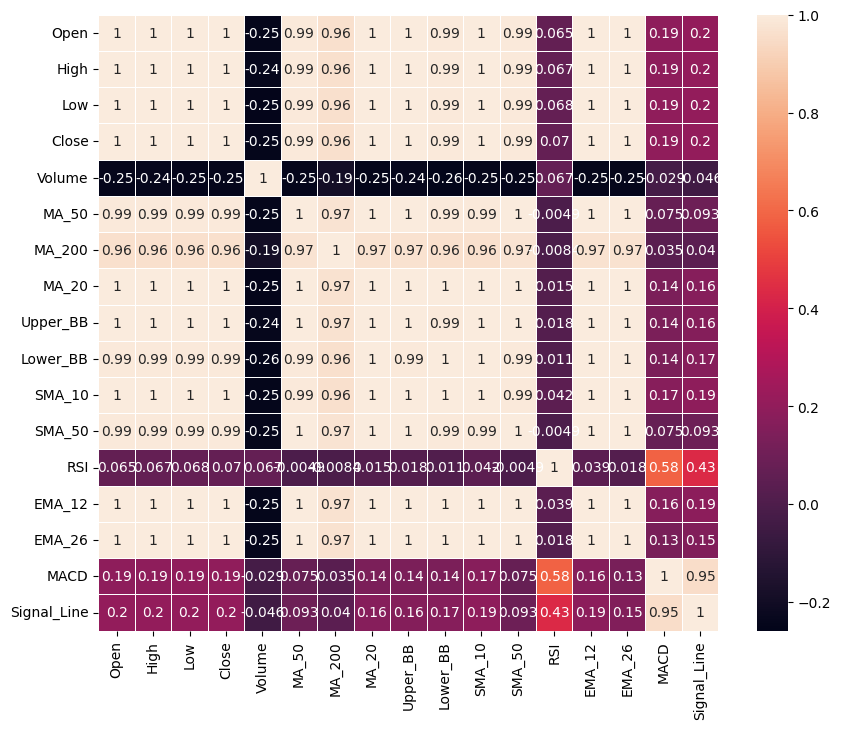

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

## Model Training Preperation

In [ ]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((5599, 4), (1400, 4))

## Model Training

#### 1. LINEAR REGRESSION

In [ ]:
# Create a linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test set
pred1 = model1.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
mae1 = mean_absolute_error(y_test, pred1)
mape1 = mean_absolute_percentage_error(y_test, pred1)
accuracy1 = accuracy_score(y_test > pred1, y_test > pred1.round())
precision1 = precision_score(y_test > pred1, y_test > pred1.round())
confusion1 = confusion_matrix(y_test > pred1, y_test > pred1.round())
recall1 = recall_score(y_test > pred1, y_test > pred1.round())
f11 = f1_score(y_test > pred1, y_test > pred1.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Confusion Matrix:\n", confusion1)
print("Recall:", recall1)
print("F1 Score:", f11)

RMSE: 1.5971034846538943
MAE: 0.9220895286291028
MAPE: 0.0063048136684322005
Accuracy: 0.8264285714285714
Precision: 0.8472418670438473
Confusion Matrix:
 [[558 108]
 [135 599]]
Recall: 0.8160762942779292
F1 Score: 0.8313671061762665


#### 2. SVR

##### With Grid Search

In [ ]:
# Create an SVR model
model2 = SVR()
param_grid = {'C':[0.1, 1], 'epsilon':[0.01, 0.1, 0.5], 'kernel':['sigmoid']}
GV_SVR = GridSearchCV(model2, param_grid = param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [ ]:
# Train the model
GV_SVR.fit(X_train, y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['sigmoid']},
             scoring='neg_mean_squared_error')

In [ ]:
# Make predictions on the test set
pred2 = GV_SVR.predict(X_test)


In [ ]:
GV_SVR.best_params_

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'sigmoid'}

##### Without Grid Search

In [ ]:
#fitting without grid search
model2.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions on the test set
pred2_1 = model2.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
mae2 = mean_absolute_error(y_test, pred2)
mape2 = mean_absolute_percentage_error(y_test, pred2)
accuracy2 = accuracy_score(y_test > pred2, y_test > pred2.round())
precision2 = precision_score(y_test > pred2, y_test > pred2.round())
confusion2 = confusion_matrix(y_test > pred2, y_test > pred2.round())
recall2 = recall_score(y_test > pred2, y_test > pred2.round())
f12 = f1_score(y_test > pred2, y_test > pred2.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Confusion Matrix:\n", confusion2)
print("Recall:", recall2)
print("F1 Score:", f12)

RMSE: 159.84020365838774
MAE: 129.46823320986678
MAPE: 2.6688097273120546
Accuracy: 1.0
Precision: 1.0
Confusion Matrix:
 [[716   0]
 [  0 684]]
Recall: 1.0
F1 Score: 1.0


#### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest model
model3 = RandomForestRegressor()

In [ ]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test set
pred3 = model3.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
mae3 = mean_absolute_error(y_test, pred3)
mape3 = mean_absolute_percentage_error(y_test, pred3)
accuracy3 = accuracy_score(y_test > pred3, y_test > pred3.round())
precision3 = precision_score(y_test > pred3, y_test > pred3.round())
confusion3 = confusion_matrix(y_test > pred3, y_test > pred3.round())
recall3 = recall_score(y_test > pred3, y_test > pred3.round())
f13 = f1_score(y_test > pred3, y_test > pred3.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Confusion Matrix:\n", confusion3)
print("Recall:", recall3)
print("F1 Score:", f13)

RMSE: 2.089910234213147
MAE: 1.181443973741967
MAPE: 0.007823110053677784
Accuracy: 0.8642857142857143
Precision: 0.8552631578947368
Confusion Matrix:
 [[625  99]
 [ 91 585]]
Recall: 0.8653846153846154
F1 Score: 0.8602941176470589


#### 4. Gradient Boosting Models (GBM)

In [ ]:
model4 = GradientBoostingRegressor()

In [ ]:
# Train the model
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Make predictions on the test set
pred4 = model4.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
mae4 = mean_absolute_error(y_test, pred4)
mape4 = mean_absolute_percentage_error(y_test, pred4)
accuracy4 = accuracy_score(y_test > pred4, y_test > pred4.round())
precision4 = precision_score(y_test > pred4, y_test > pred4.round())
confusion4 = confusion_matrix(y_test > pred4, y_test > pred4.round())
recall4 = recall_score(y_test > pred4, y_test > pred4.round())
f14 = f1_score(y_test > pred4, y_test > pred4.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse4)
print("MAE:", mae4)
print("MAPE:", mape4)
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Confusion Matrix:\n", confusion4)
print("Recall:", recall4)
print("F1 Score:", f14)

RMSE: 2.527850198307996
MAE: 1.5750741695636592
MAPE: 0.011277926306126987
Accuracy: 0.9014285714285715
Precision: 0.9004329004329005
Confusion Matrix:
 [[638  69]
 [ 69 624]]
Recall: 0.9004329004329005
F1 Score: 0.9004329004329005


#### 5. Extreme Gradient Boosting (XGBoost)

In [ ]:
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [ ]:
# Train the model
model5.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
pred5 = model5.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse5 = np.sqrt(mean_squared_error(y_test, pred5))
mae5 = mean_absolute_error(y_test, pred5)
mape5 = mean_absolute_percentage_error(y_test, pred5)
accuracy5 = accuracy_score(y_test > pred5, y_test > pred5.round())
precision5 = precision_score(y_test > pred5, y_test > pred5.round())
confusion5 = confusion_matrix(y_test > pred5, y_test > pred5.round())
recall5 = recall_score(y_test > pred5, y_test > pred5.round())
f15 = f1_score(y_test > pred5, y_test > pred5.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse5)
print("MAE:", mae5)
print("MAPE:", mape5)
print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Confusion Matrix:\n", confusion5)
print("Recall:", recall5)
print("F1 Score:", f15)

RMSE: 2.3004193733799627
MAE: 1.4111869876052856
MAPE: 0.010069702403483725
Accuracy: 0.8957142857142857
Precision: 0.8978723404255319
Confusion Matrix:
 [[621  72]
 [ 74 633]]
Recall: 0.8953323903818954
F1 Score: 0.896600566572238


#### 6. AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoost model
model6 = AdaBoostRegressor()

In [ ]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
# Make predictions on the test set
pred6 = model6.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse6 = np.sqrt(mean_squared_error(y_test, pred6))
mae6 = mean_absolute_error(y_test, pred6)
mape6 = mean_absolute_percentage_error(y_test, pred6)
accuracy6 = accuracy_score(y_test > pred6, y_test > pred6.round())
precision6 = precision_score(y_test > pred6, y_test > pred6.round())
confusion6 = confusion_matrix(y_test > pred6, y_test > pred6.round())
recall6 = recall_score(y_test > pred6, y_test > pred6.round())
f16 = f1_score(y_test > pred6, y_test > pred6.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse6)
print("MAE:", mae6)
print("MAPE:", mape6)
print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Confusion Matrix:\n", confusion6)
print("Recall:", recall6)
print("F1 Score:", f16)

RMSE: 9.92028119125887
MAE: 8.096477707119973
MAPE: 0.21640220894760712
Accuracy: 0.99
Precision: 0.9940357852882704
Confusion Matrix:
 [[886   3]
 [ 11 500]]
Recall: 0.9784735812133072
F1 Score: 0.9861932938856016


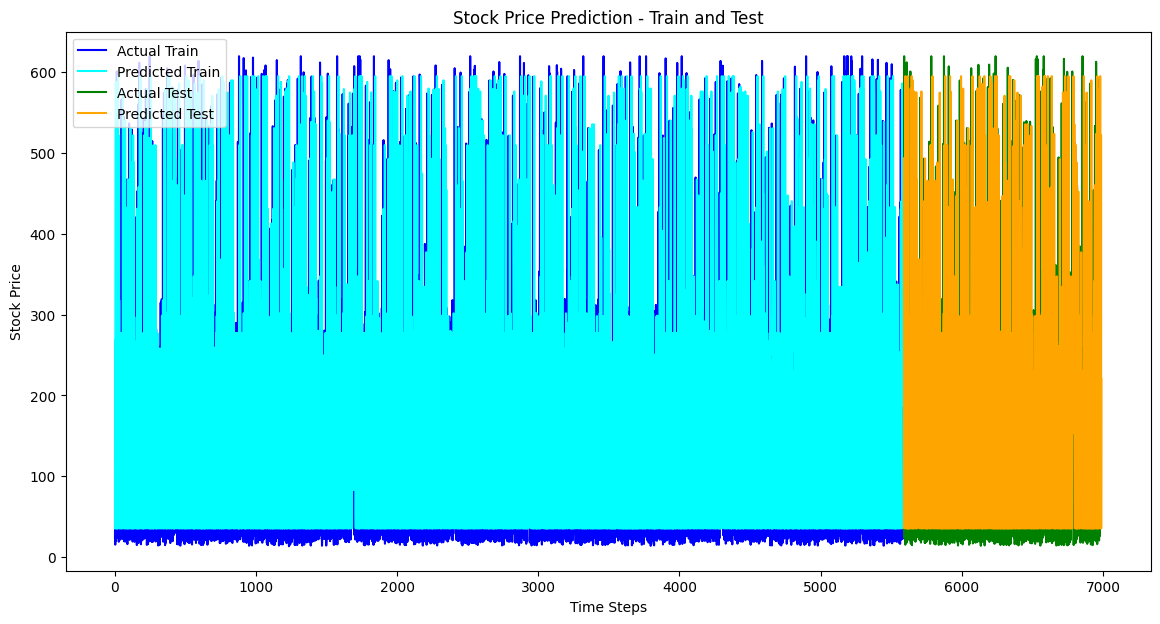

In [ ]:
y_train_actual = np.array(y_train[n_steps-1:]).reshape(-1, 1)
y_test_actual = np.array(y_test[n_steps-1:]).reshape(-1, 1)

# Generate predictions
train_predictions = model6.predict(X_train)
test_predictions = model6.predict(X_test)

# Plot the results
plt.figure(figsize=(14, 7))

# Training set
plt.plot(range(len(y_train_actual)), y_train_actual, label="Actual Train", color="blue")
plt.plot(range(len(train_predictions)), train_predictions, label="Predicted Train", color="cyan")

# Testing set
test_index_start = len(y_train_actual)
plt.plot(range(test_index_start, test_index_start + len(y_test_actual)), y_test_actual, label="Actual Test", color="green")
plt.plot(range(test_index_start, test_index_start + len(test_predictions)), test_predictions, label="Predicted Test", color="orange")

plt.title("Stock Price Prediction - Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


#### 7. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree model
model7 = DecisionTreeRegressor()

In [ ]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the test set
pred7 = model7.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse7 = np.sqrt(mean_squared_error(y_test, pred7))
mae7 = mean_absolute_error(y_test, pred7)
mape7 = mean_absolute_percentage_error(y_test, pred7)
accuracy7 = accuracy_score(y_test > pred7, y_test > pred7.round())
precision7 = precision_score(y_test > pred7, y_test > pred7.round())
confusion7 = confusion_matrix(y_test > pred7, y_test > pred7.round())
recall7 = recall_score(y_test > pred7, y_test > pred7.round())
f17 = f1_score(y_test > pred7, y_test > pred7.round())


In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse7)
print("MAE:", mae7)
print("MAPE:", mape7)
print("Accuracy:", accuracy7)
print("Precision:", precision7)
print("Confusion Matrix:\n", confusion7)
print("Recall:", recall7)
print("F1 Score:", f17)

RMSE: 2.662964650047198
MAE: 1.5168383194642856
MAPE: 0.009950821219785279
Accuracy: 0.8721428571428571
Precision: 0.871301775147929
Confusion Matrix:
 [[632  87]
 [ 92 589]]
Recall: 0.8649045521292217
F1 Score: 0.8680913780397936


#### 8. KNeighborsRegressor(KNN)

In [ ]:
# Create a KNN model
model8 = KNeighborsRegressor()
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 15, 20, 23, 25, 30, 60, 70, 150]}
GV_KNN = GridSearchCV(model8, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Make predictions on the test set
pred8 = model8.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse8 = np.sqrt(mean_squared_error(y_test, pred8))
mae8 = mean_absolute_error(y_test, pred8)
mape8 = mean_absolute_percentage_error(y_test, pred8)
accuracy8 = accuracy_score(y_test > pred8, y_test > pred8.round())
precision8 = precision_score(y_test > pred8, y_test > pred8.round())
confusion8 = confusion_matrix(y_test > pred8, y_test > pred8.round())
recall8 = recall_score(y_test > pred8, y_test > pred8.round())
f18 = f1_score(y_test > pred8, y_test > pred8.round())

In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse8)
print("MAE:", mae8)
print("MAPE:", mape8)
print("Accuracy:", accuracy8)
print("Precision:", precision8)
print("Confusion Matrix:\n", confusion8)
print("Recall:", recall8)
print("F1 Score:", f18)

RMSE: 144.28823901949488
MAE: 103.4758962792857
MAPE: 1.5529338074390124
Accuracy: 0.98
Precision: 0.9760479041916168
Confusion Matrix:
 [[720  16]
 [ 12 652]]
Recall: 0.9819277108433735
F1 Score: 0.978978978978979


In [ ]:
# Grid Search parameters
GV_KNN.fit(X_train, y_train)
pred8_1 = GV_KNN.predict(X_test)
GV_KNN.best_estimator_

KNeighborsRegressor(n_neighbors=70)

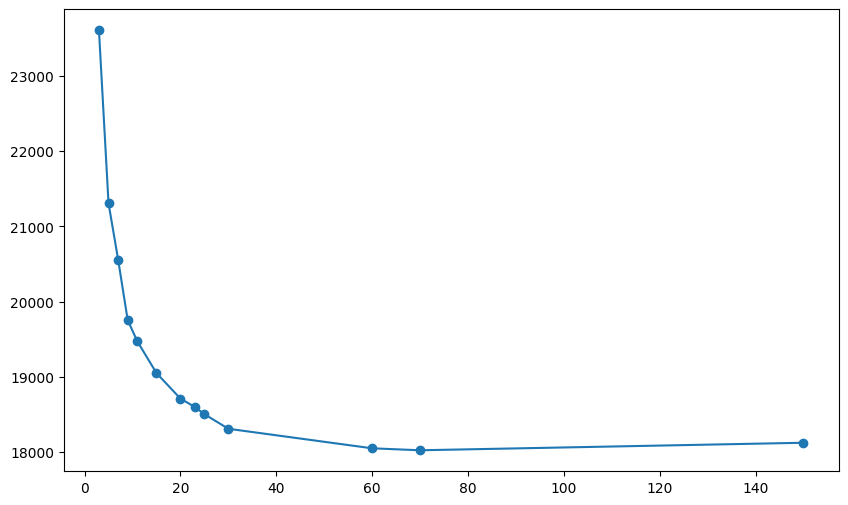

In [ ]:
import matplotlib.pyplot as plt
results = GV_KNN.cv_results_
mse = -results['mean_test_score']
k_values = results['param_n_neighbors'].data
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse, marker='o', linestyle='-')
plt.show()

##### KNN Hyperparameter Tuning

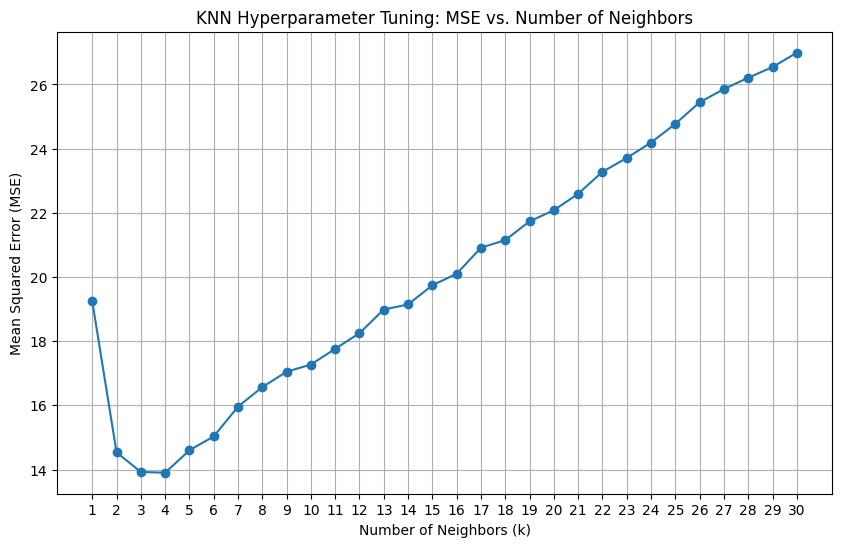

In [ ]:
from sklearn.model_selection import cross_val_score

# KNN Hyperparameter Tuning
def knn_hyperparameter_tuning(X_train, y_train):
    k_values = range(1, 31)  # Example range for k
    mse_values = []

    for k in k_values:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        mse = -cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        mse_values.append(mse)

    return k_values, mse_values

# Perform KNN Hyperparameter Tuning
k_values, mse_values = knn_hyperparameter_tuning(X_train_scaled, y_train)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('KNN Hyperparameter Tuning: MSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)  # Show all k values on x-axis
plt.grid()
plt.show()

#### 9. Artificial Neural Networks (ANN)

In [ ]:
# Create an ANN model
from tensorflow.keras.layers import Input
model9 = Sequential()
Input(shape=(X_train.shape[1],))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Make predictions on the test set
pred9 = model9.predict(X_test_scaled).flatten()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Calculate evaluation metrics
rmse9 = np.sqrt(mean_squared_error(y_test, pred9))
mae9 = mean_absolute_error(y_test, pred9)
mape9 = mean_absolute_percentage_error(y_test, pred9)
accuracy9 = accuracy_score(y_test > pred9, y_test > pred9.round())
precision9 = precision_score(y_test > pred9, y_test > pred9.round())
confusion9 = confusion_matrix(y_test > pred9, y_test > pred9.round())
recall9 = recall_score(y_test > pred9, y_test > pred9.round())
f19 = f1_score(y_test > pred9, y_test > pred9.round())


In [ ]:
# Print the evaluation metrics
print("RMSE:", rmse9)
print("MAE:", mae9)
print("MAPE:", mape9)
print("Accuracy:", accuracy9)
print("Precision:", precision9)
print("Confusion Matrix:\n", confusion9)
print("Recall:", recall9)
print("F1 Score:", f19)

RMSE: 2.6938808114100348
MAE: 1.6001938002954539
MAPE: 0.010317139174483646
Accuracy: 0.8735714285714286
Precision: 0.894878706199461
Confusion Matrix:
 [[559  78]
 [ 99 664]]
Recall: 0.8702490170380078
F1 Score: 0.8823920265780731


#### 10. LSTM(Long Short term Memory)

In [ ]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [ ]:
# Create an LSTM model
model10 = Sequential()
Input(shape=(n_steps, n_features))
model10.add(LSTM(64, activation='relu'))
model10.add(Dense(1))


In [ ]:
# Compile the model
model10.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Train the model
model10.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [ ]:
# Make predictions on the test set
y_pred = model10.predict(X_test_reshaped).flatten()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
# Calculate evaluation metrics
rmse10 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred))
mae10 = mean_absolute_error(y_test[n_steps-1:], y_pred)
mape10 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred)
accuracy10 = accuracy_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
precision10 = precision_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
recall10 = recall_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
f110 = f1_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
confusion10 = confusion_matrix(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())


In [ ]:
# Print evaluation metrics
print("RMSE:", rmse10)
print("MAE:", mae10)
print("MAPE:", mape10)
print("Accuracy:", accuracy10)
print("Precision:", precision10)
print("Recall:", recall10)
print("F1 Score:", f110)
print("Confusion Matrix:\n", confusion10)

RMSE: 10.363480898051167
MAE: 8.210490513026333
MAPE: 0.14350155307382698
Accuracy: 0.9935298346513299
Precision: 0.9949238578680203
Recall: 0.98989898989899
F1 Score: 0.9924050632911392
Confusion Matrix:
 [[794   3]
 [  6 588]]


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


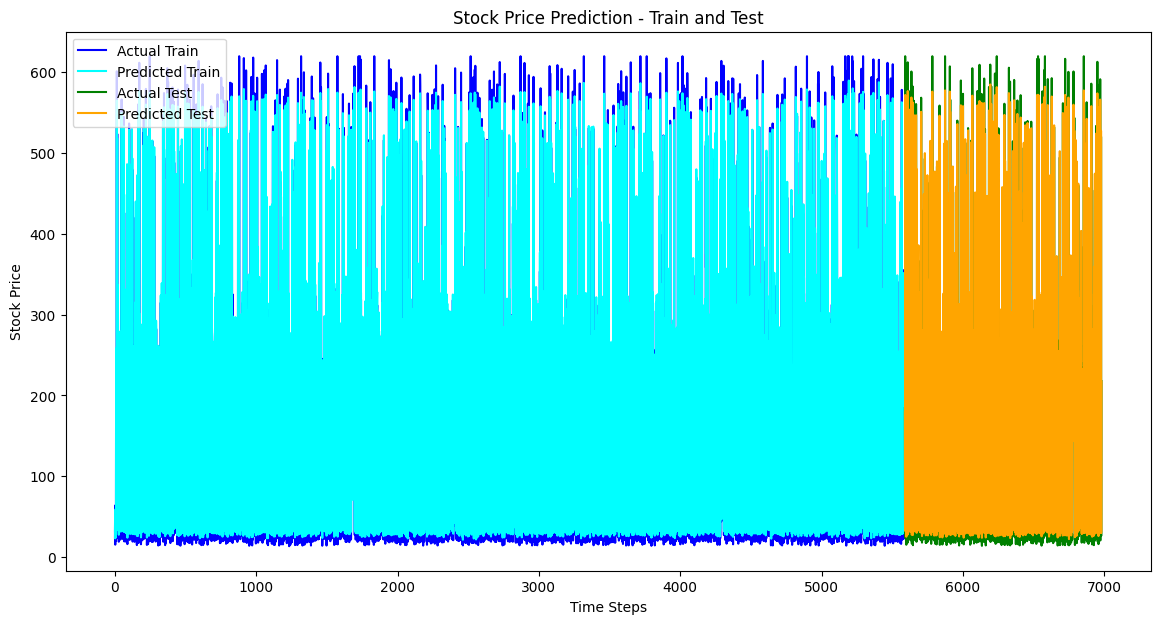

In [ ]:
y_train_actual = np.array(y_train[n_steps-1:]).reshape(-1, 1)
y_test_actual = np.array(y_test[n_steps-1:]).reshape(-1, 1)

# Generate predictions
train_predictions = model10.predict(X_train_reshaped)
test_predictions = model10.predict(X_test_reshaped)

# Plot the results
plt.figure(figsize=(14, 7))

# Training set
plt.plot(range(len(y_train_actual)), y_train_actual, label="Actual Train", color="blue")
plt.plot(range(len(train_predictions)), train_predictions, label="Predicted Train", color="cyan")

# Testing set
test_index_start = len(y_train_actual)
plt.plot(range(test_index_start, test_index_start + len(y_test_actual)), y_test_actual, label="Actual Test", color="green")
plt.plot(range(test_index_start, test_index_start + len(test_predictions)), test_predictions, label="Predicted Test", color="orange")

plt.title("Stock Price Prediction - Train and Test")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### Model Performance Graphs

#### Accuracy

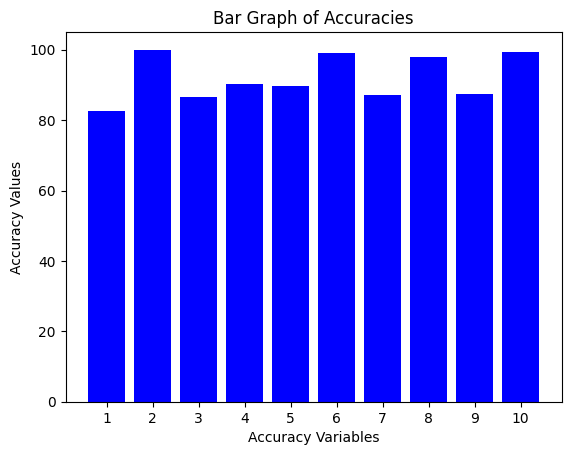

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from accuracy1 to accuracy10
accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100, accuracy5*100, accuracy6*100, accuracy7*100, accuracy8*100, accuracy9*100, accuracy10*100]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()


#### RMSE

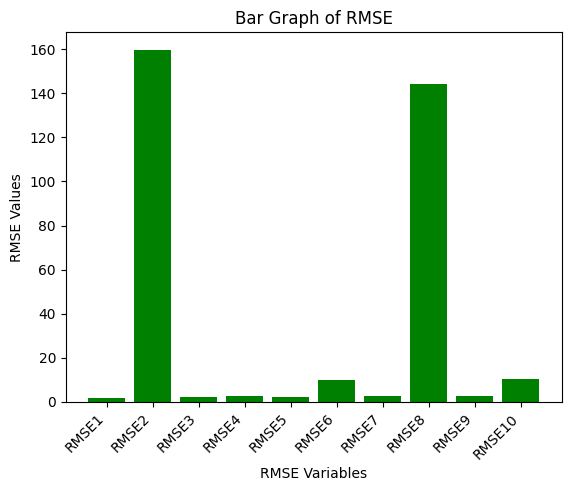

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of RMSE values from rmse1 to rmse10
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10]

# List of corresponding labels for each RMSE value
labels = ['RMSE1', 'RMSE2', 'RMSE3', 'RMSE4', 'RMSE5', 'RMSE6', 'RMSE7', 'RMSE8', 'RMSE9', 'RMSE10']

# Plotting the bar graph
plt.bar(labels, rmse_values, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()


#### MAE

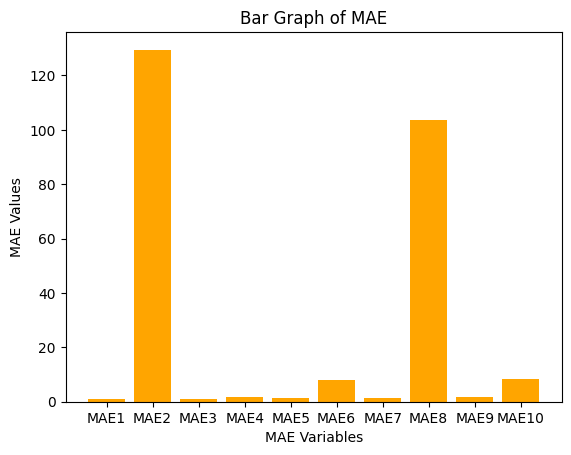

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAE values from mae1 to mae10
mae_values = [mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10]

# List of corresponding labels for each MAE value
labels = ['MAE1', 'MAE2', 'MAE3', 'MAE4', 'MAE5', 'MAE6', 'MAE7', 'MAE8', 'MAE9', 'MAE10']

# Plotting the bar graph
plt.bar(labels, mae_values, color='orange')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()


#### MAPE

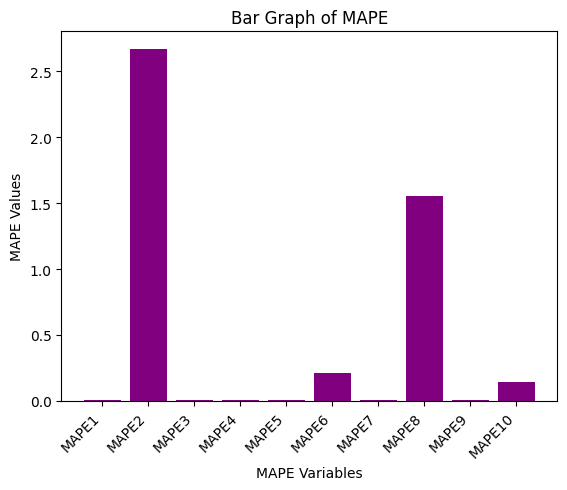

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAPE values from mape1 to mape10
mape_values = [mape1, mape2, mape3, mape4, mape5, mape6, mape7, mape8, mape9, mape10]

# List of corresponding labels for each MAPE value
labels = ['MAPE1', 'MAPE2', 'MAPE3', 'MAPE4', 'MAPE5', 'MAPE6', 'MAPE7', 'MAPE8', 'MAPE9', 'MAPE10']

# Plotting the bar graph
plt.bar(labels, mape_values, color='purple')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()


#### Precision

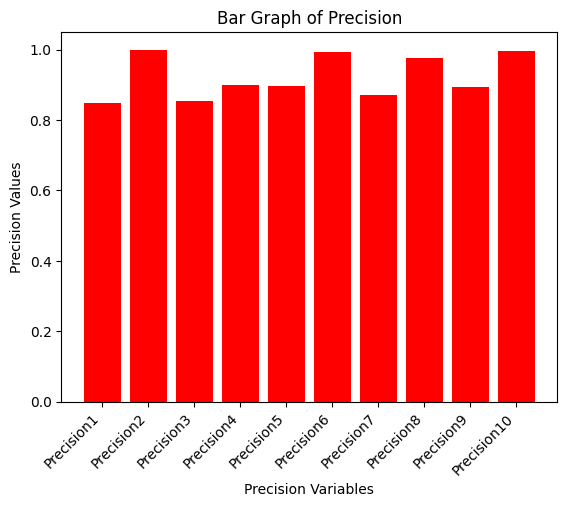

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of precision values from precision1 to precision10
precision_values = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]

# List of corresponding labels for each precision value
labels = ['Precision1', 'Precision2', 'Precision3', 'Precision4', 'Precision5', 'Precision6', 'Precision7', 'Precision8', 'Precision9', 'Precision10']

# Plotting the bar graph
plt.bar(labels, precision_values, color='red')
plt.xlabel('Precision Variables')
plt.ylabel('Precision Values')
plt.title('Bar Graph of Precision')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()


#### Recall

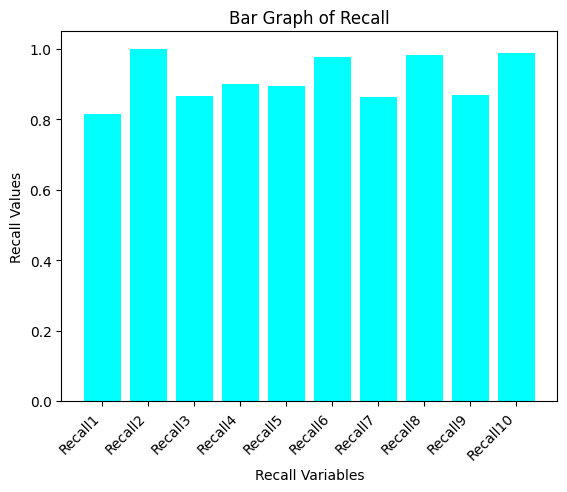

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of recall values from recall1 to recall10
recall_values = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

# List of corresponding labels for each recall value
labels = ['Recall1', 'Recall2', 'Recall3', 'Recall4', 'Recall5', 'Recall6', 'Recall7', 'Recall8', 'Recall9', 'Recall10']

# Plotting the bar graph
plt.bar(labels, recall_values, color='cyan')
plt.xlabel('Recall Variables')
plt.ylabel('Recall Values')
plt.title('Bar Graph of Recall')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()
